In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [ ]:
import sqlite3
con = sqlite3.connect('data/data.sqlite')
cur = con.cursor()
cur.execute("DROP TABLE IF EXISTS ohlc")

In [ ]:
cur = con.cursor()
cur.execute("SELECT timestamp, open FROM ohlc WHERE timestamp >= 1513226220 AND timestamp < 1513237020 ")
result = cur.fetchall()

In [22]:
start = 1513226220
diff = 1513237020 - 1513226220
m = diff // 60
h = m//60
nxt = 1513237020 + diff
print(diff)
print(m)
print(h)

10800
180
3


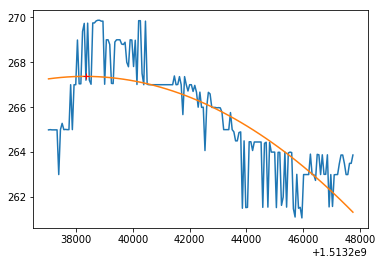

In [23]:
import sqlite3
import matplotlib.pyplot as plt
from trading.data import fit, extract, peaks
from trading.sql import window
con = sqlite3.connect('data/alldata.sqlite')
result = window(con, 1513237020, nxt)
xs, ys, x_new, y_new, f = fit(extract(result))
ps = peaks(y_new)
plt.plot(xs, ys, x_new, y_new, x_new[ps], y_new[ps],'r+')
plt.show()

In [ ]:
import sqlite3
import matplotlib.pyplot as plt
from trading.data import fit, extract, peaks
from trading.sql import window
con = sqlite3.connect('data/alldata.sqlite')
result = window(con, 1513237020, nxt)
xs, ys, x_new, y_new, f = fit(extract(result))
ps = peaks(y_new)
plt.plot(xs, ys, x_new, y_new, x_new[ps], y_new[ps],'b+')
plt.show()

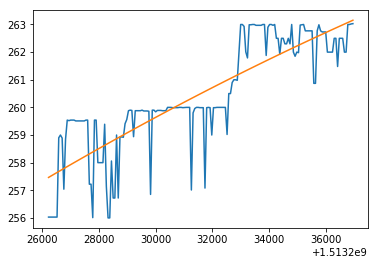

In [17]:
import sqlite3
import matplotlib.pyplot as plt
from trading.data import fit, extract
from trading.sql import window
con = sqlite3.connect('data/alldata.sqlite')
result = window(con, 1513226220, 1513237020)
xs, ys, x_new, y_new, f = fit(extract(result))
plt.plot(xs, ys, x_new, y_new)
plt.show()

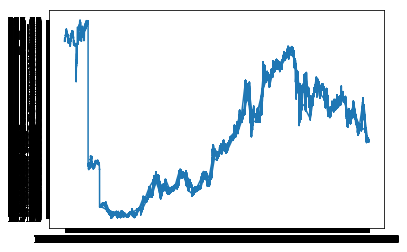

In [7]:
import sqlite3
import matplotlib.pyplot as plt

from trading.data import fit, extract
con = sqlite3.connect('data/alldata.sqlite')
cur = con.cursor()
cur.execute("SELECT timestamp, open FROM ohlc")

result = [x for x in cur.fetchall()]
#result = [[1513226220,"256.03","256.03","256.03","256.03","0.00","0.00000000",0],[1513226280,"256.03","256.03","256.03","256.03","0.00","0.00000000",0]]
xs, ys = extract(result)
plt.plot(xs, ys)
plt.show()

In [18]:
from IPython.html.widgets import interact
from IPython.html import widgets
from trading.data import fit, extract
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from trading.data import fit, extract, peaks
import sqlite3
from trading.sql import window

con = sqlite3.connect('data/alldata.sqlite')
cur = con.cursor()
cur.execute("SELECT min(timestamp) FROM ohlc")
start = int(cur.fetchall()[0][0])
cur.execute("SELECT max(timestamp) FROM ohlc")
end = int(cur.fetchall()[0][0])

windowpos = start
windowsize = 10800

@interact(pos = (int(start), int(end), 1800))
def modify(pos = windowpos):
    global windowpos
    windowpos = int(pos)

@interact(s = int(windowsize))
def setsize(s = windowsize):
    global windowsize
    windowsize = int(s)


interactive(children=(IntSlider(value=1513226220, description='pos', max=1525154700, min=1513226220, step=1800…

interactive(children=(IntSlider(value=10800, description='s', max=32400, min=-10800), Output()), _dom_classes=…

In [ ]:
from IPython.html.widgets import interact
from IPython.html import widgets
from trading.data import fit, extract
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from trading.data import fit, extract, peaks
import sqlite3
from trading.sql import window

con = sqlite3.connect('data/alldata.sqlite')
cur = con.cursor()
cur.execute("SELECT min(timestamp) FROM ohlc")
start = int(cur.fetchall()[0][0])
cur.execute("SELECT max(timestamp) FROM ohlc")
end = int(cur.fetchall()[0][0])

windowpos = start
windowsize = 10800

@interact(pos = (int(start), int(end), 1800))
def modify(pos = windowpos):
    global windowpos
    windowpos = int(pos)

@interact(s = int(windowsize))
def setsize(s = windowsize):
    global windowsize
    windowsize = int(s)

result = window(con, windowpos, windowpos + windowsize)

print(start)
print(end)
print(type(start))
print(type(end))
print(windowpos)
print(windowsize)
print(result)    

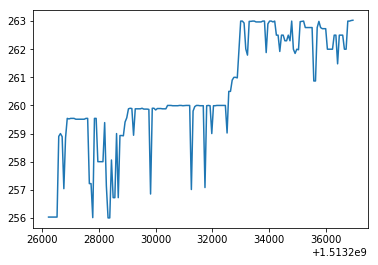

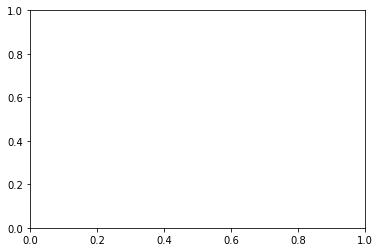

In [19]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML
from trading.data import fit, extract
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from trading.data import fit, extract, peaks
import sqlite3
from trading.sql import window

con = sqlite3.connect('data/alldata.sqlite')
cur = con.cursor()

#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)
fig, ax = plt.subplots()
data = query(0)
xs, ys, x_new, y_new, f = fit(extract(data))
line, = ax.plot(xs,ys,lw=2)

def query(i):
    global windowpos
    global windowsize
    global con
    
    return window(con, windowpos, windowpos + windowsize)

def animate(data):
    global windowpos
    global windowsize
    global con

    result = window(con, windowpos, windowpos + windowsize)
    xs, ys, x_new, y_new, f = fit(extract(result))
    ps = peaks(y_new)
    plt.cla()
    line, ax.plot(xs, ys)
    return (line,)

ani = animation.FuncAnimation(fig, animate, interval=5000)
plt.show()
HTML(ani.to_html5_video())
#interact(modify,pos = (start, end))